# Dimensionality Reduction in Python

It's the 7th course in [DataCamp Machine Learning in Python Track](https://learn.datacamp.com/career-tracks/machine-learning-scientist-with-python?version=1). Jeroen Boeye is the instructor. He is a Machine Learning Engineer @ Faktion

the first part of this notebook contains the main Algorithms I learned from [the course](https://learn.datacamp.com/courses/dimensionality-reduction-in-python).  The second is how I implemented these algorithms into real-world datasets
 
## Part 1: Main Algorithms
### Ch1. Exploring high dimensional data
Why reduce dimensionality? <br>
1. reduce time and memory cost
2. lower chance of model overfit

- **Visualization**: <br>
&emsp; sns.pairplot -> the distribusion and scatter plot for all numeric features<br>
&emsp; TSNE ->When you want to visually explore the patterns in a high dimensional dataset <br>


### Ch2. Feature selection I, selecting for feature information
1. remove cols that conatins high percentages of NA
2. remove cols with low variance (VarianceThershold)
3. Pairwise correlation but take care of anscombe's quartet!!

 - **Algorithms**: <br>
&emsp; - sklearn.feature_selection.VarianceThershold -> remove low variance features <br>
&emsp; - pd.DataFrame.corr() -> gives correlation matrix <br>
 - **Helpers**: sns.heapmap() -> visualize correlation_matrix


### Ch3. Feature selection II, selecting for model accuracy
 - **Algorithms**: <br>
1. sklearn.feature_selection.RFE = recursive feature elimination (rfe.support_, rfe.ranking_) 
2. Tree-based feature selection -> decision_tree.feature_importances_ > 0.1
3. Regularized Linear Regression 'LassoCV'-> choose the optimum alpha alone, lasso.alpha_ ,lasso.coef_ != 0

### Ch4. Feature extraction
pca.explained_variance_ratio_

## Part 2: Real-world Datasets
#### import libraries


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib notebook

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

### House Prices: Advanced Regression Techniques Kaggle Competition
- **Kaggle Link**: [this competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) aims to create feature engineering and advanced regression techniques.
- **Algorithms**: 
- **Visualization**: <br>
- **Evaluation**: 


count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


<IPython.core.display.Javascript object>


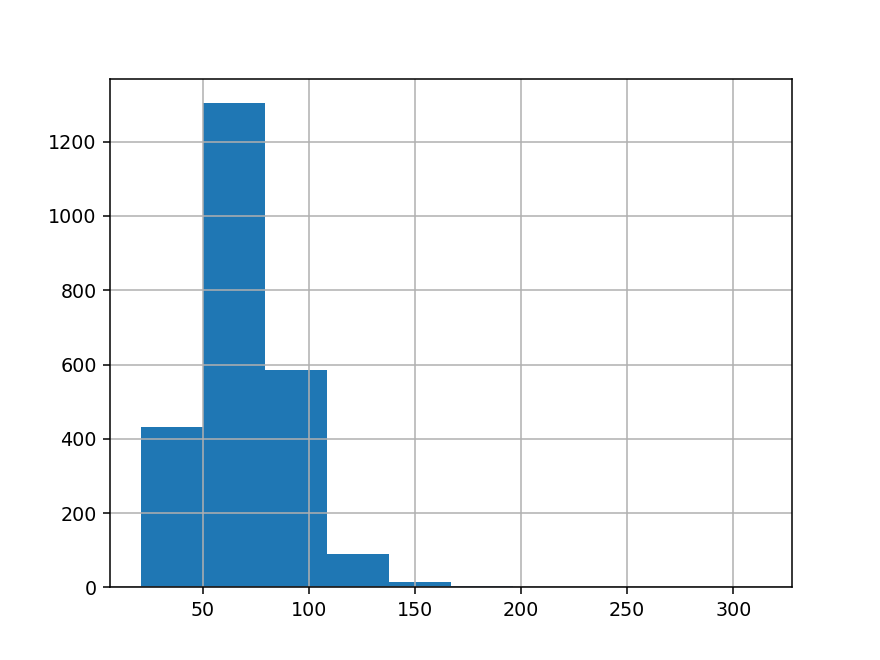

<IPython.core.display.Javascript object>


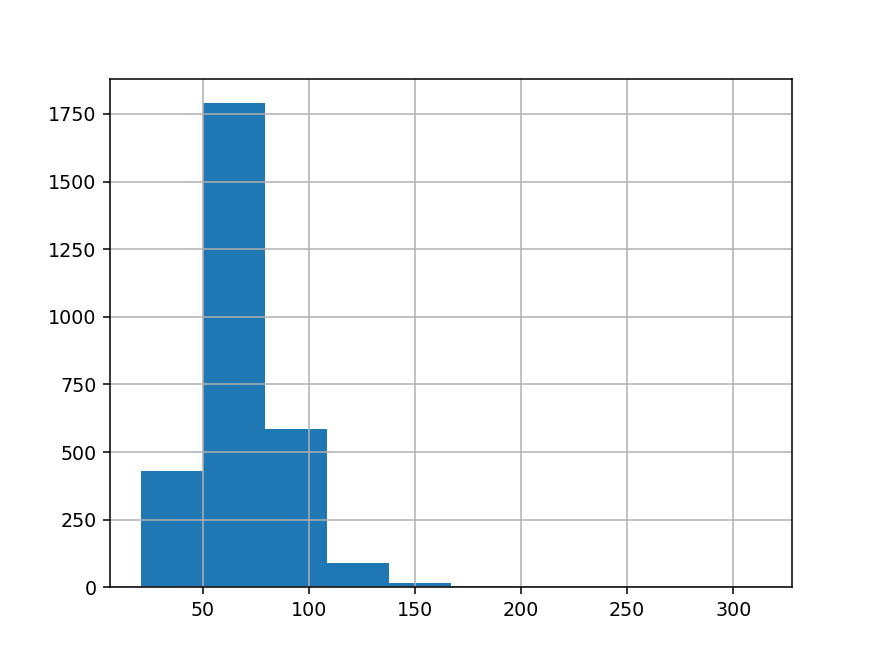

count    2919.000000
mean       69.305795
std        21.312345
min        21.000000
25%        60.000000
50%        69.305795
75%        78.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [2]:
data = pd.read_csv('Datasets/house_regression_kaggle_competition/train.csv', index_col =  0)
X_submit = pd.read_csv('Datasets/house_regression_kaggle_competition/test.csv', index_col =  0)

y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)


df = data.append(X_submit).drop('SalePrice', axis = 1)

df.describe()
# 36 numeric cols 
# large variance between the features -> normalize 

df.describe(exclude = 'number')
# 43 categorical cols

# process numeric cols 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df.describe()

(numeric_df.isna().sum()) # LotFrontage 486, GarageYrBlt 159 NA

# LotFrontage replace na
print(numeric_df['LotFrontage'].describe())
fig1, ax1 = plt.subplots()
numeric_df['LotFrontage'].hist()
# mean == median, slight right slewed
numeric_df['LotFrontage'].fillna(value =  numeric_df['LotFrontage'].mean(), inplace = True)
fig2, ax2 = plt.subplots()
print(numeric_df['LotFrontage'].describe())
numeric_df['LotFrontage'].hist()


count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


<IPython.core.display.Javascript object>


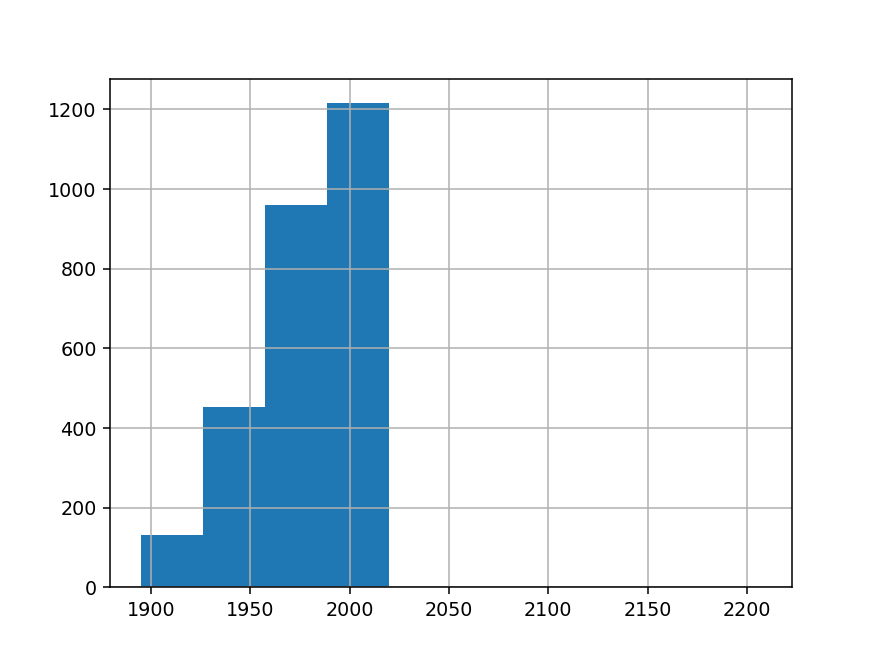

<IPython.core.display.Javascript object>


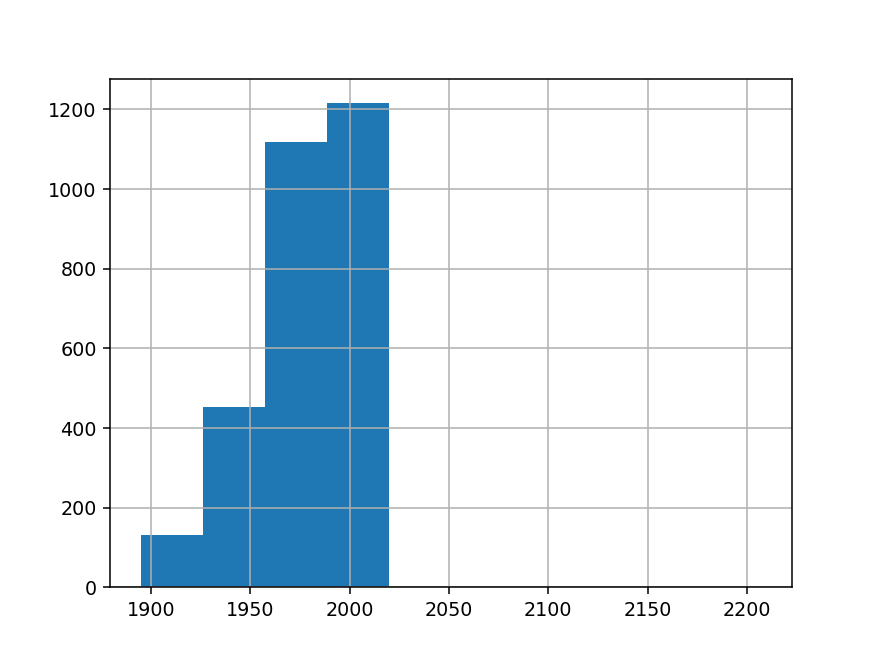

count    2919.000000
mean     1978.113406
std        24.867762
min      1895.000000
25%      1961.500000
50%      1978.113406
75%      2001.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


In [3]:

# GarageYrBlt replace na
print(numeric_df['GarageYrBlt'].describe())
fig3, ax3 = plt.subplots()
numeric_df['GarageYrBlt'].hist()
# mean == median, left-skewed
numeric_df['GarageYrBlt'].fillna(value =  numeric_df['GarageYrBlt'].mean(), inplace = True)
fig4, ax4 = plt.subplots()
numeric_df['GarageYrBlt'].hist()
print(numeric_df['GarageYrBlt'].describe())





<IPython.core.display.Javascript object>


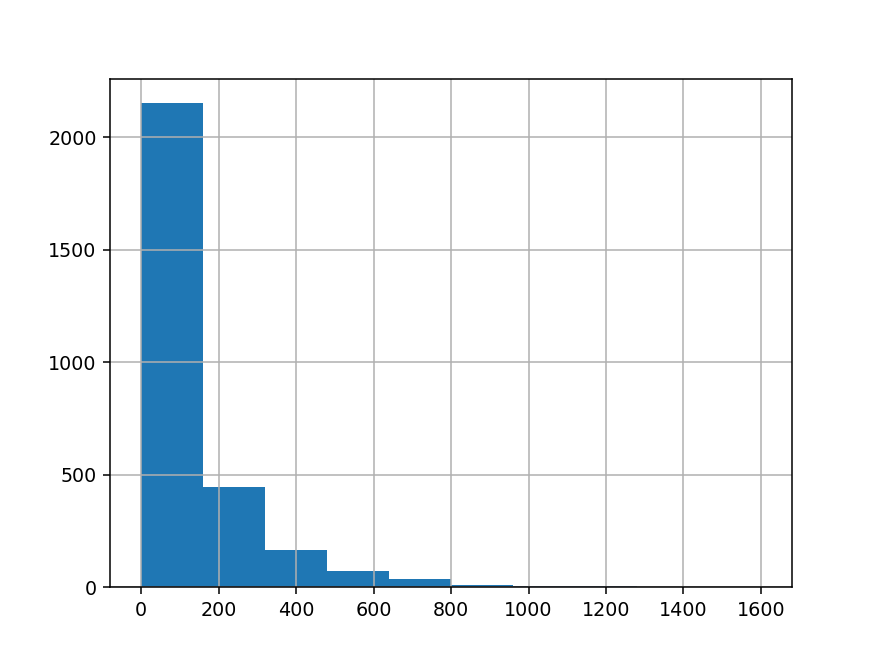

In [4]:
(numeric_df.isna().sum()) # MasVnrArea 23
numeric_df['MasVnrArea'].describe()
fig5, ax5 = plt.subplots()
numeric_df['MasVnrArea'].hist()
numeric_df['MasVnrArea'].fillna(value =  numeric_df['MasVnrArea'].median(), inplace = True)
numeric_df.fillna(method = 'ffill', inplace = True)


<IPython.core.display.Javascript object>


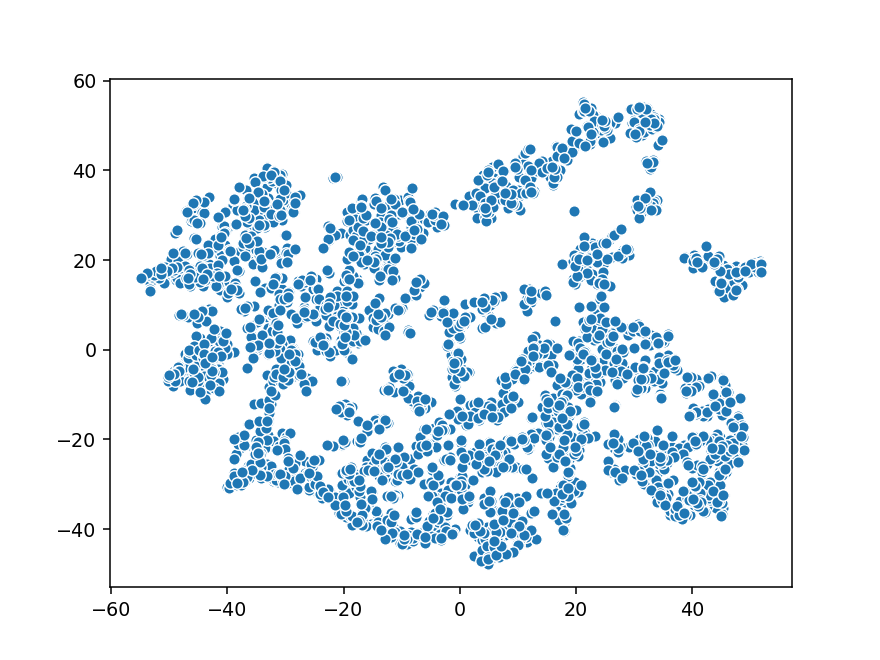

In [5]:
# 1. Normalize
normalize = Normalizer()
numeric_df_scaled = pd.DataFrame(normalize.fit_transform(numeric_df))
numeric_df_scaled

# TSNE plot to overall visualization
tsne = TSNE(learning_rate = 50)
numeric_df_tsne = tsne.fit_transform(numeric_df_scaled)
fig6, ax6 = plt.subplots()
sns.scatterplot(x= numeric_df_tsne[:, 0], y = numeric_df_tsne[:, 1])

<IPython.core.display.Javascript object>


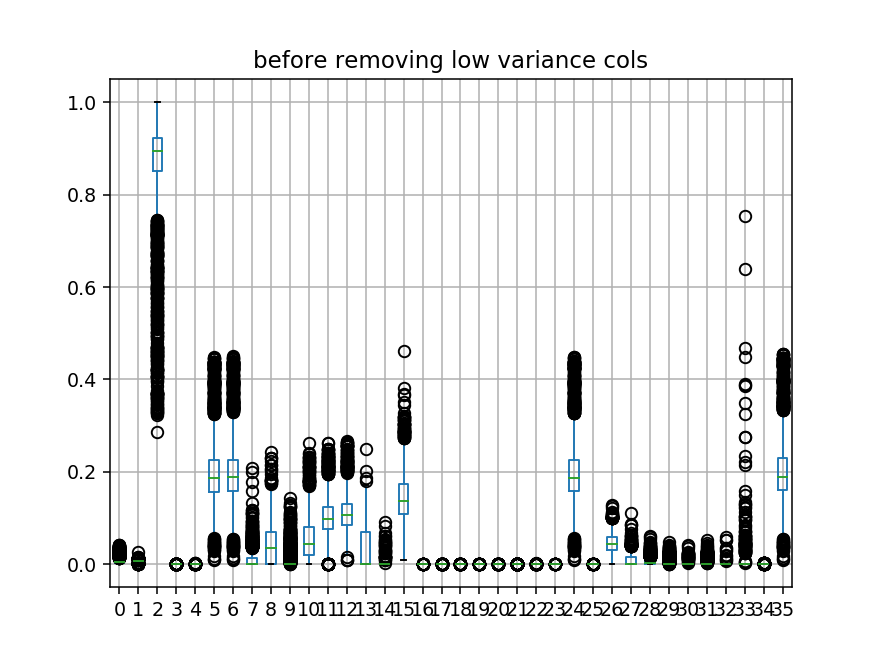

<IPython.core.display.Javascript object>


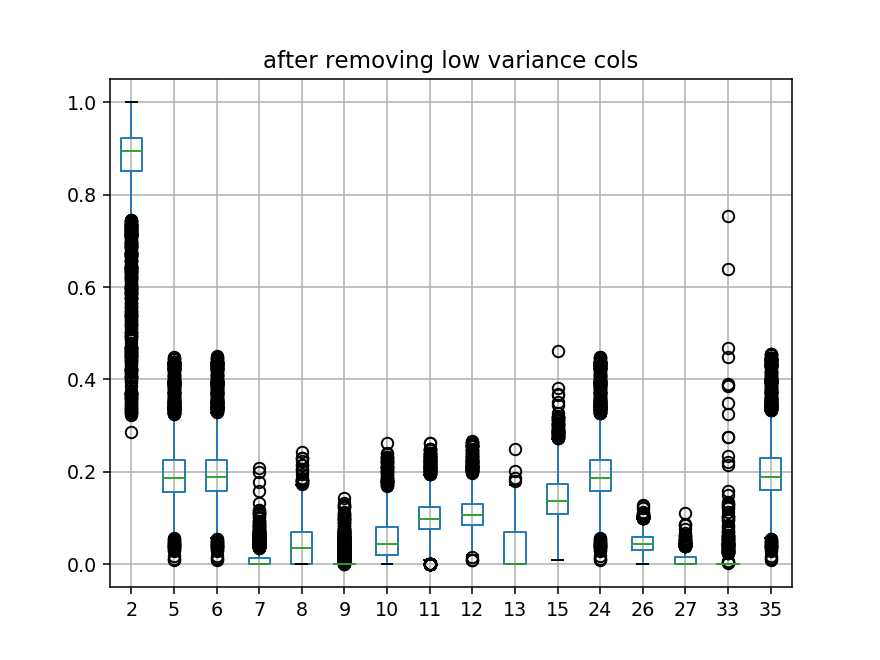

Dimensionality reduced from 36 to 16.


In [6]:
# 2. varianceThershold
fig, ax = plt.subplots()
numeric_df_scaled.boxplot()
plt.gca().set_title('before removing low variance cols')

var_cut = VarianceThreshold(1e-04)
var_cut.fit(numeric_df_scaled)
mask = var_cut.get_support()
reduced_numeric_df = numeric_df_scaled.loc[:, mask]

fig, ax = plt.subplots()
reduced_numeric_df.boxplot()
plt.gca().set_title('after removing low variance cols')


print("Dimensionality reduced from {} to {}.".format(numeric_df_scaled.shape[1], reduced_numeric_df.shape[1]))

<IPython.core.display.Javascript object>


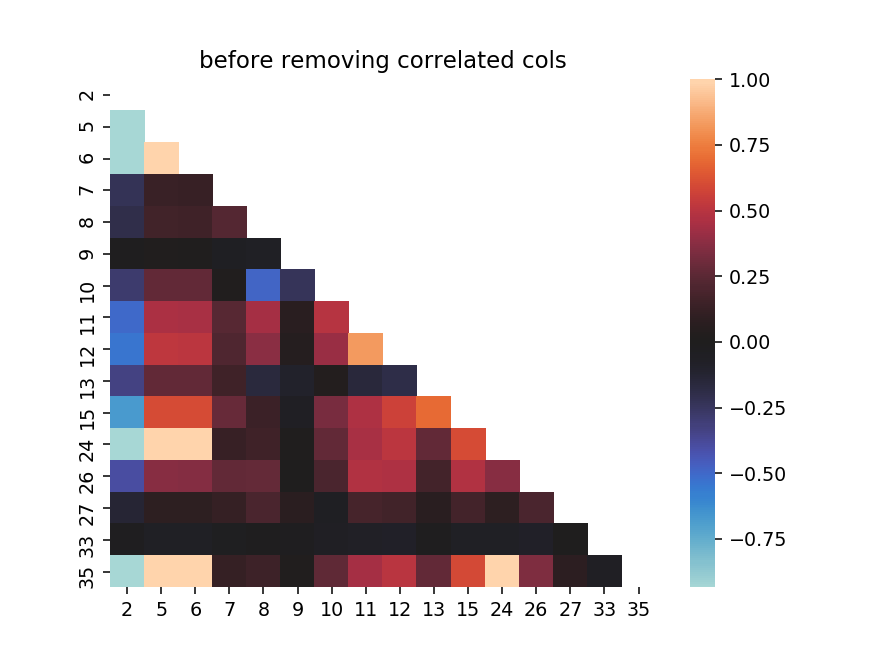

<IPython.core.display.Javascript object>


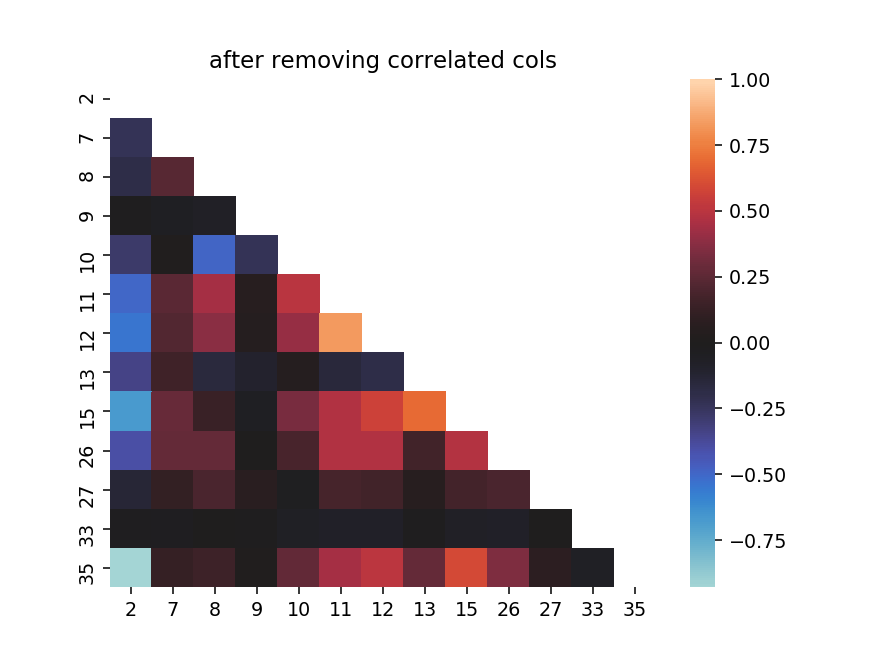

Dimensionality reduced from 16 to 13.


In [7]:
# 3. Pairwise correlation
fig, ax = plt.subplots()
corr = reduced_numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) # remove half of the matrix
sns.heatmap(corr, mask= mask, center = 0)
plt.gca().set_title('before removing correlated cols')

shape1 = reduced_numeric_df.shape[1]
corr_abs = corr.abs()
mask = np.triu(np.ones_like(corr_abs, dtype = bool)) # remove half of the matrix
tri_df = corr.mask(mask) # to avoid duplicates
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
reduced_numeric_df.drop(to_drop, axis = 1, inplace =True )

fig, ax = plt.subplots()
corr = reduced_numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) # remove half of the matrix
sns.heatmap(corr, mask= mask, center = 0)
plt.gca().set_title('after removing correlated cols')

print("Dimensionality reduced from {} to {}.".format(shape1, reduced_numeric_df.shape[1]))